In [45]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [18]:
# !/usr/bin/env python

Python 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0] :: Anaconda, Inc. on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
KeyboardInterrupt
>>> 

In [6]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## IPython的matplotlib模式

+ 要使用Matplotlib创建绘图，必须首先启用IPython的matplotlib模式。

+ 要执行此操作，请运行%matplotlib 魔法命令以在当前Notebook中启用绘图。

+ 这个魔法采用一个可选参数来指定应该使用哪个Matplotlib后端。 大多数情况下，在Notebook中使用inline后端，在Notebook中嵌入绘图

Matplotlib的Gallery页面 中有上百幅缩略图，打开之后都有源程序。
如果需要绘制某种类型的图，只需要在这个页面中浏览/复制/粘贴一下。

https://matplotlib.org/gallery.html

## matplotlib的图形结构

### 四层结构
+ 画板（Canvas）：画板位于最底层，用于放置画布，它只是辅助工具，并不需要我们实际操作
    + 画布（Figure）：画布位于画板之上，是绘图的基础
        + 坐标系（Axes）：画布上用于绘图的区域，一块画布上可以开辟出多个独立的绘图区
            + 图形元件：线、文本等
            


### 画板（Canvas）
+ Canvas代表了真正进行绘图的后端(backend)，python逻辑上的绘图必须连接后端的绘图程序才能真正在屏幕上绘制出来(或者保存为文件)。
+ 可以将canvas理解为绘图的物理(或者说硬件)实现。

### 画布

https://junye0798.com/post/the-many-ways-to-call-axes-in-matplotlib/featured.png

https://tse4-mm.cn.bing.net/th/id/OIP-C.-ZWf8B-8abmfRRnLoAlEngAAAA?pid=ImgDet&rs=1

https://www.gairuo.com/file/pic/2020/12/matplotlib-anatomy.png

<function matplotlib.pyplot.show(close=None, block=None)>

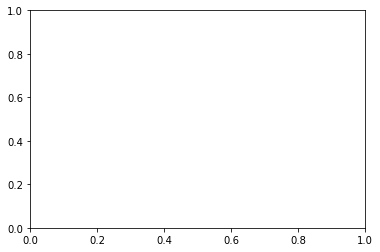

In [46]:
ax1 = plt.axes()
plt.show

### 坐标系
对于画布来说，可以有多个坐标系，至少要有一个

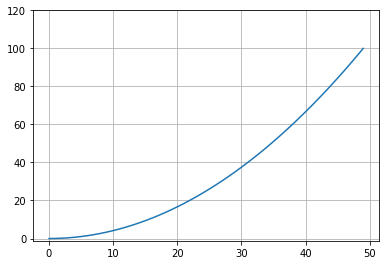

In [10]:
x = np.linspace(0,10)
plt.axes([.1,.1,.8,.8],ylim=(-1.2,120))
# 每个元素的值是画布宽度和高度的分数。即将画布的宽、高作为 1 个单位。
# 比如，[ 0.1, 0.1, 0.8, 0.8]，它代表着从画布 10% 的位置开始绘制, 宽高是画布的 80%。
plt.grid(True)
plt.plot(x**2)

也可以两个图叠一起

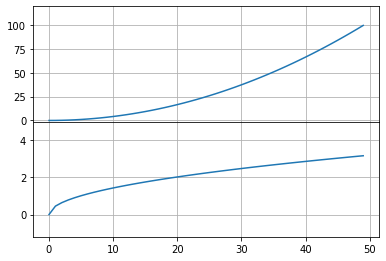

In [11]:
x = np.linspace(0,10)
plt.axes([.1,.5,.8,.4],ylim=(-1.2,120))
plt.grid(True)
plt.plot(x**2)

plt.axes([.1,.1,.8,.4],ylim=(-1.2,5))
plt.grid(True)
plt.plot(np.sqrt(x))


#### 多图：子图的方法

<Figure size 432x288 with 0 Axes>

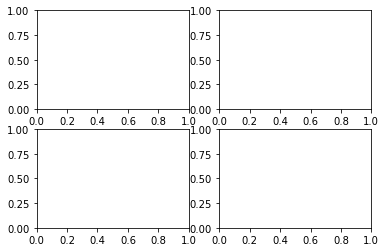

In [12]:
fig = plt.figure()  # an empty figure with no axes
fig,ax_lst = plt.subplots(2, 2)  

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


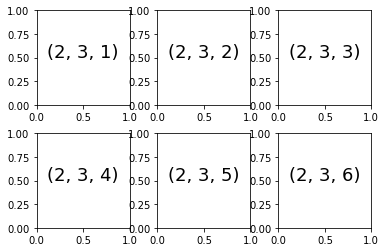

In [13]:
plt.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(.5,.5,str((2,3,i)),fontsize=18,ha='center')
    
plt.show

<function matplotlib.pyplot.show>

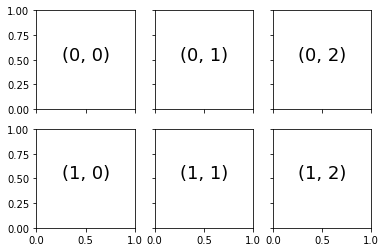

In [135]:
fig,ax = plt.subplots(2,3,sharex='col',sharey='row')
for i in range(2):
    for j in range(3):
        ax[i,j].text(.5,.5,str((i,j)),fontsize=18,ha='center')
        
plt.show

#### 多图：坐标系的方法

需要传递四个参数：
+ x坐标
+ y坐标
+ 宽
+ 高


这四个值的取值都是[0,1]，大图的左下为（0,0)，右上端为（1,1），四个参数反映的是小图和大图的比例关系。

<function matplotlib.pyplot.show(close=None, block=None)>

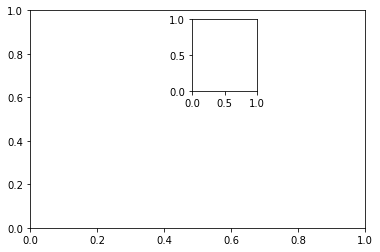

In [14]:
ax1 = plt.axes()
ax1 = plt.axes([.5,.6,.15,.25])
plt.show

可以在一个大图中画多个小图

<function matplotlib.pyplot.show(close=None, block=None)>

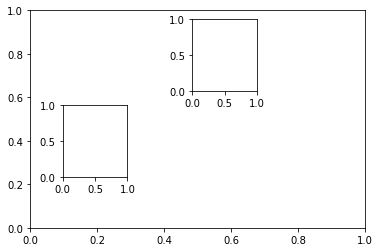

In [15]:
ax1 = plt.axes()
ax1 = plt.axes([.5,.6,.15,.25])
ax1 = plt.axes([.2,.3,.15,.25])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

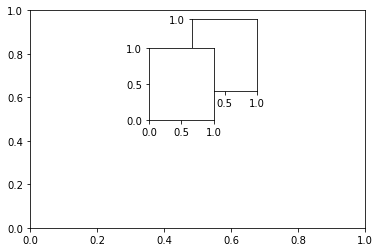

In [16]:
ax1 = plt.axes()
ax1 = plt.axes([.5,.6,.15,.25])
ax1 = plt.axes([.4,.5,.15,.25])
plt.show

可以分别对小图进行画图

<function matplotlib.pyplot.show(close=None, block=None)>

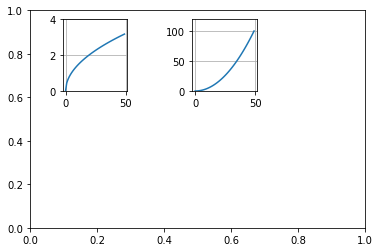

In [17]:
x = np.linspace(0,10)
ax1 = plt.axes()
ax1 = plt.axes([.5,.6,.15,.25],ylim=(0,120))
plt.grid(True)
plt.plot(x**2)


ax1 = plt.axes([.2,.6,.15,.25],ylim=(0,4))
plt.grid(True)
plt.plot(np.sqrt(x))


plt.show

### 图形元件

主要指Line2D、 Rectangle、 Text等

## 在Artists上基于对象的图形编程

### Artists的分类
+ Figure, Axes和图形元件都可以称为Artists
+ Artists是matplotlib的一个基础类


+ Artists分为两种：
    + 容器类型：包含许多简单类型的Artists，使它们组织成一个整体，例如Axis、 Axes、Figure等
    + 简单容器：标准的绘图元件，Line2D、 Rectangle、 Text等

想象一个画面：
+ 有三个人过马路，上班族、老奶奶和小学生
    + 上班族手中有公文包
    + 老奶奶手里有拐杖
    + 小学生背上有书包

+ 画面中的上班族、老奶奶、小学生、公文包、拐杖、书包、红绿灯、斑马线都可以称为对象
+ 不同的对象间有从属关系，比如公文包属于上班族，书包属于小学生
+ 有些对象间是并行的，比如上班族、老奶奶、小学生、红绿灯、斑马线
+ 这些对象都在一块画布上，虽然没有明显的边缘，但是还是可以感觉到这个画布的边缘
+ 所有上面提到的元素都属于这块画布

### Figure

+ Figure包括组成图表的所有元素。
+ 图表的背景是一个Rectangle对象，用Figure.patch属性表示。
+ 调用add_subplot或者add_axes方法往图表中添加轴(子图时)，这些子图都将添加到Figure.axes属性

[<AxesSubplot:>, <matplotlib.axes._axes.Axes at 0x7fa1dd2116d0>]

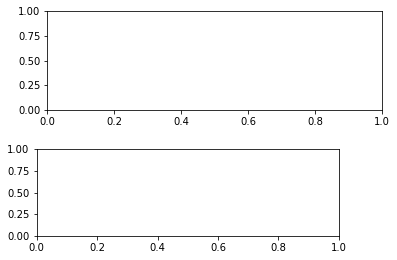

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
# 再如，221，指的就是将这块画布分为2×1，然后1对应的就是1号区
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])
ax1
ax2
fig.axes

### Axes 坐标系
+ 坐标系标签： set_title()

    

#### 调用Axes的属性

+ 有一个patch属性作为背景
    + 笛卡尔坐标时，patch属性是一个Rectangle对象
    + 极坐标时，patch属性则是Circle对象

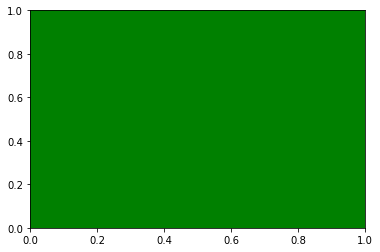

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor("green")

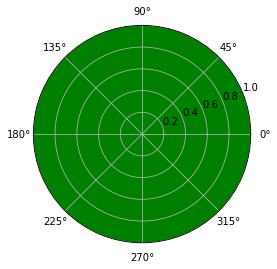

In [19]:
fig = plt.figure()
ax = plt.axes(projection=None, polar=True)
ax.patch.set_facecolor("green")

调用Axes的绘图方法（例如plot），它将创建一组Line2D对象

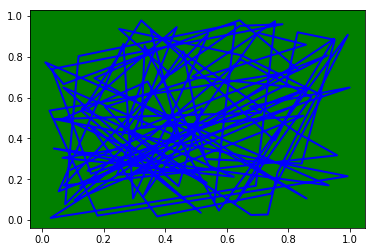

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor("green")
x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, "-", color="blue", linewidth=2)
#ax.lines

[ 1.  0.  1.  0.  0.  1.  0.  0.  2.  1.  1.  2.  7.  6.  5.  5.  9. 17.
 20. 17. 40. 28. 36. 39. 51. 44. 57. 64. 49. 46. 60. 55. 54. 42. 43. 28.
 39. 21. 27. 21. 17. 14.  9.  6.  6.  4.  2.  1.  1.  1.]
[-4.05662543e+00 -3.91661319e+00 -3.77660094e+00 -3.63658870e+00
 -3.49657646e+00 -3.35656421e+00 -3.21655197e+00 -3.07653972e+00
 -2.93652748e+00 -2.79651523e+00 -2.65650299e+00 -2.51649075e+00
 -2.37647850e+00 -2.23646626e+00 -2.09645401e+00 -1.95644177e+00
 -1.81642952e+00 -1.67641728e+00 -1.53640503e+00 -1.39639279e+00
 -1.25638055e+00 -1.11636830e+00 -9.76356057e-01 -8.36343813e-01
 -6.96331569e-01 -5.56319325e-01 -4.16307080e-01 -2.76294836e-01
 -1.36282592e-01  3.72965275e-03  1.43741897e-01  2.83754141e-01
  4.23766386e-01  5.63778630e-01  7.03790874e-01  8.43803119e-01
  9.83815363e-01  1.12382761e+00  1.26383985e+00  1.40385210e+00
  1.54386434e+00  1.68387658e+00  1.82388883e+00  1.96390107e+00
  2.10391332e+00  2.24392556e+00  2.38393781e+00  2.52395005e+00
  2.66396229e+00

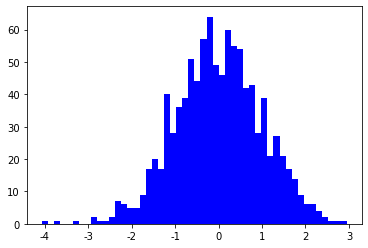

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rects = ax.hist(np.random.randn(1000), 50, facecolor="blue")
#rects
#rects[0]
#ax.patches[0]
print(n)
print(bins)

Text(0.5,1,'我是小白')

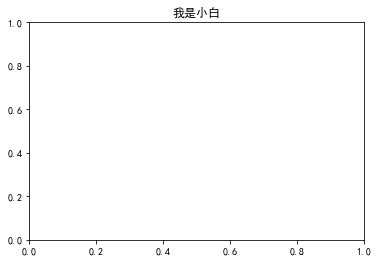

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("我是小白", fontdict=None, loc='center')

#### 添加平行的图形元件

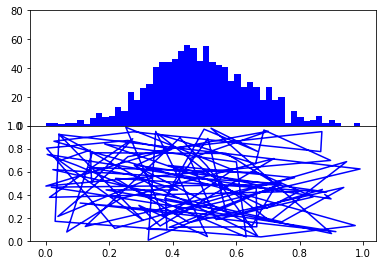

In [21]:
plt.axes([.1,.5,.8,.4],ylim=(-0,80))
x= np.random.randn(1000)
plt.hist(x, 50, facecolor="blue")

plt.axes([.1,.1,.8,.4],ylim=(0,1))
x, y = np.random.rand(2, 100)
line, = plt.plot(x, y, "-", color="blue", linewidth=1.5)


### Axis 坐标轴
+ 坐标轴标签: set_xlabel()
+ 坐标轴刻度：Locator
+ 坐标轴刻度标签: Formatter
+ 取值范围：set_xlim()


包括坐标轴上的刻度线、刻度文本、坐标网格以及坐标轴标题等内容。
+ 刻度包括主刻度和副刻度，分别通过Axis.get_major_ticks和Axis.get_minor_ticks方法获得。
+ 每个刻度线都是一个XTick或者YTick对象，它包括实际的刻度线和刻度文本。
+ Axis对象提供了get_ticklabels和get_ticklines方法分别直接获得刻度线和刻度文本

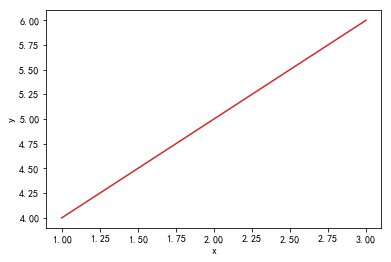

In [45]:
fig, ax1 = plt.subplots()
x = [1,2,3]
y = [4,5,6]
color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.plot(x, y, color=color)

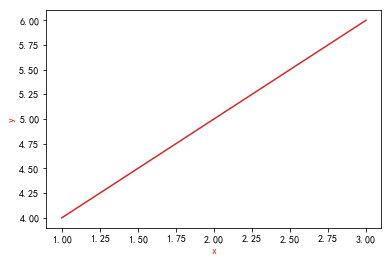

In [46]:
fig, ax1 = plt.subplots()
x = [1,2,3]
y = [4,5,6]
color = 'tab:red'
ax1.set_xlabel('x', color=color)
ax1.set_ylabel('y', color=color)
ax1.plot(x, y, color=color)

In [47]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

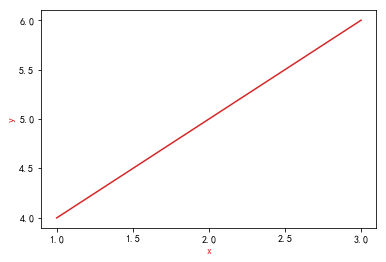

In [47]:
xminorLocator   = MultipleLocator(0.5) #将x主刻度标签设置为0.5的倍数
xminorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式

ymajorLocator   = MultipleLocator(0.5) #将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式


fig, ax1 = plt.subplots()
x = [1,2,3]
y = [4,5,6]
color = 'tab:red'
ax1.set_xlabel('x', color=color)
ax1.set_ylabel('y', color=color)
ax1.plot(x, y, color=color)

ax1.xaxis.set_major_locator(xminorLocator )
ax1.xaxis.set_major_formatter(xminorFormatter)

ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)



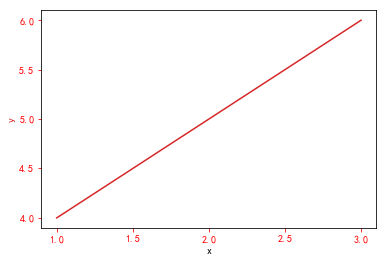

In [62]:
xminorLocator   = MultipleLocator(.5) #将x主刻度标签设置为0.5的倍数
xminorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式

ymajorLocator   = MultipleLocator(0.5) #将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式


fig, ax1 = plt.subplots()
x = [1,2,3]
y = [4,5,6]
color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('y', color=color)
ax1.plot(x, y, color=color)

ax1.xaxis.set_major_locator(xminorLocator )
ax1.xaxis.set_major_formatter(xminorFormatter)

ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)

ax1.tick_params(colors='r')


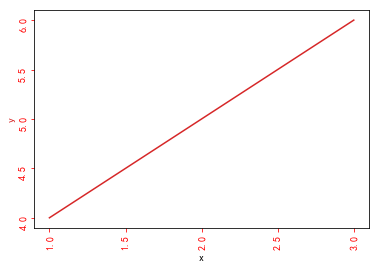

In [61]:
xminorLocator   = MultipleLocator(.5) #将x主刻度标签设置为0.5的倍数
xminorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式

ymajorLocator   = MultipleLocator(0.5) #将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式


fig, ax1 = plt.subplots()
x = [1,2,3]
y = [4,5,6]
color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('y', color=color)
ax1.plot(x, y, color=color)

ax1.xaxis.set_major_locator(xminorLocator )
ax1.xaxis.set_major_formatter(xminorFormatter)

ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)

ax1.tick_params(colors='r',rotation=90)

(1, 5)

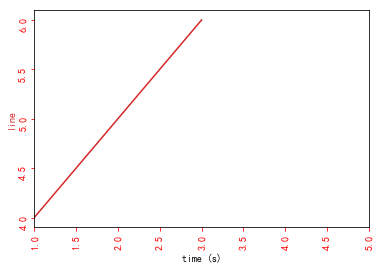

In [60]:
xminorLocator   = MultipleLocator(.5) #将x主刻度标签设置为0.5的倍数
xminorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式

ymajorLocator   = MultipleLocator(0.5) #将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式


fig, ax1 = plt.subplots()
x = [1,2,3]
y = [4,5,6]
color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('y', color=color)
ax1.plot(x, y, color=color)

ax1.xaxis.set_major_locator(xminorLocator )
ax1.xaxis.set_major_formatter(xminorFormatter)

ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)

ax1.tick_params(colors='r',rotation=90)

ax1.set_xlim(1,5)

Text(0.5,0,'Stages')

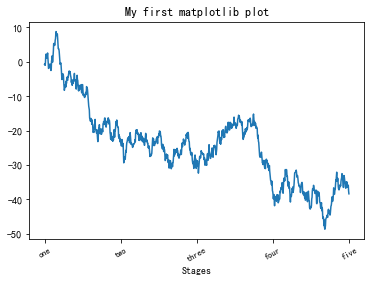

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000))
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### 图形元件

**默认情况下，在每个单元格的末尾清除Figure对象，因此需要为单个单元格中的单个图形发出所有绘图命令。**

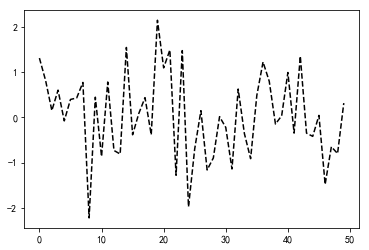

In [67]:
fig = plt.figure()
plt.plot(np.random.randn(50), 'k--')

字符|类型 | 字符|类型
---|--- | --- | ---
`  '-'	`| 实线 | `'--'`|	虚线
`'-.'`|	虚点线 | `':'`|	点线
`'.'`|	点 | `','`| 像素点
`'o'`	|圆点 | `'v'`|	下三角点
`'^'`|	上三角点 | `'<'`|	左三角点
`'>'`|	右三角点 | `'1'`|	下三叉点
`'2'`|	上三叉点 | `'3'`|	左三叉点
`'4'`|	右三叉点 | `'s'`|	正方点
`'p'`	| 五角点 | `'*'`|	星形点
`'h'`|	六边形点1 | `'H'`|	六边形点2 
`'+'`|	加号点 | `'x'`|	乘号点
`'D'`|	实心菱形点 | `'d'`|	瘦菱形点 
`'_'`|	横线点 | |


字符 | 颜色
-- | -- 
`‘b’`|	蓝色，blue
`‘g’`|	绿色，green
`‘r’`|	红色，red
`‘c’`|	青色，cyan
`‘m’`|	品红，magenta
`‘y’`|	黄色，yellow
`‘k’`|	黑色，black
`‘w’`|	白色，white

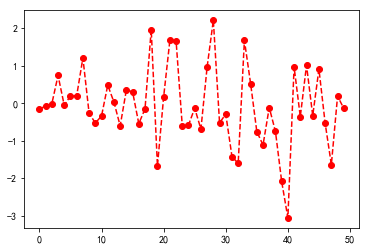

In [69]:
fig = plt.figure()
plt.plot(np.random.randn(50), 'ro--')

#### 图例设置

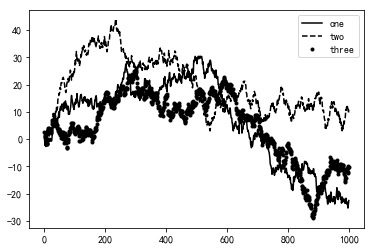

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

#### 注解

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

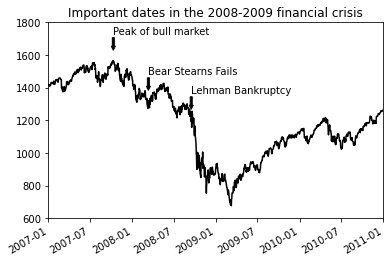

In [33]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
print(spx)

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

#### 呈现多图的示例

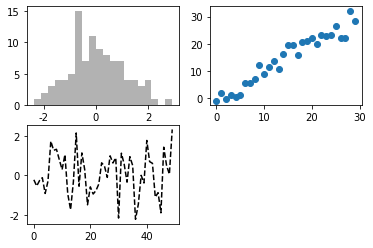

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50), 'k--')
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))